In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [10]:
# X = (hours sleeping, hours studying), y = Score on test
X = np.array(([3,5], [5,1], [10,2]), dtype=float)
y = np.array(([75], [82], [93]), dtype=float)
X , y

(array([[ 3.,  5.],
        [ 5.,  1.],
        [10.,  2.]]),
 array([[75.],
        [82.],
        [93.]]))

#### scaling the result between 0 and 1.

In [11]:
X = X/np.amax(X, axis=0)
y = y/100 #Max test score is 100
X , y

(array([[0.3, 1. ],
        [0.5, 0.2],
        [1. , 0.4]]),
 array([[0.75],
        [0.82],
        [0.93]]))

In [12]:
X.shape, y.shape

((3, 2), (3, 1))

In [13]:
%pylab inline


Populating the interactive namespace from numpy and matplotlib


# Forward Propagation

In [20]:
class Neural_Network(object):
    def __init__(self):
        
        # Define hyperparameters
        self.inputLayerSize = 2
        self.hiddenLayerSize = 3
        self.outputLayerSize = 1
        
        # Weights parameters
        self.W1 = np.random.rand(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.rand(self.hiddenLayerSize, self.outputLayerSize)        
    
    def sigmoid(self, x):
        return (1/(1+np.exp(-x)))
    
    def sigmoidPrime(self, z):
        #Derivative of sigmoid function
        return np.exp(-z)/((1+np.exp(-z))**2)

        
    def forward(self, X):
        self.z1 = np.dot(X, self.W1)
        self.o1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.o1, self.W2)
        return self.sigmoid(self.z2) # yHat

        

In [21]:
model = Neural_Network()

In [22]:
yHat = model.forward(X)

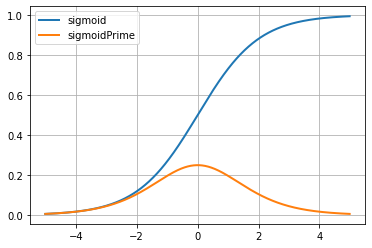

In [23]:
testValues = np.arange(-5,5,0.01)
plot(testValues, model.sigmoid(testValues), linewidth=2)
plot(testValues, model.sigmoidPrime(testValues), linewidth=2)
plt.grid(1)
legend(['sigmoid', 'sigmoidPrime'])


# Gradient Descent.

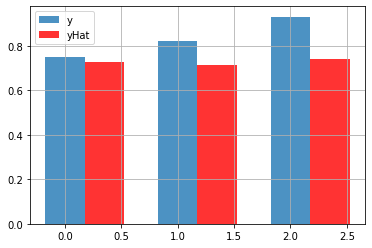

In [24]:
#Compare estimate, yHat, to actually score
bar([0,1,2], y.flatten(), width = 0.35, alpha=0.8)
bar([0.35,1.35,2.35],yHat.flatten(), width = 0.35, color='r', alpha=0.8)
plt.grid()
legend(['y', 'yHat'])

***

<h4><font color='green'>Our results are not quit good, we need a way to update our weights in order to have close output to the real one</font></h4> 


One way to compute an overall cost is to take each error value, square it, and add these values together. Multiplying by one half will make things simpler down the road. Now that we have a cost, or job is to minimize it. When someone says they’re training a network, what they really mean is that they're minimizing a cost function.

$$J=\sum \frac{1}{2}(y-\hat{y})^2$$

OUR cost is a function of two things, our examples, and the weights on our synapses. We don't have much control of our data, so we'll minimize our cost by changing the weights.

A first thought is to just try and search for the best combinaison of weights. 
Like just **TRY ALL THE WEIGHTS UNTIL FINDING THE BEST ONE! After all I have a computer!**

And there you go ..  the **CURSE OF DIMENSIONALITY**.

***
<h4><font color='red'> Lets try out with one weight </font></h4> 


In [57]:
import time
import time

weightsToTry = np.linspace(-5,5,1000)
costs = np.zeros(1000)

startTime = time.process_time()
for i in range(1000):
    model.W1[0,0] = weightsToTry[i]
    yHat = model.forward(X)
    costs[i] = 0.5*sum((y-yHat)**2)
    
endTime = time.process_time()

timeElapsed = endTime-startTime
timeElapsed

0.07897299999999952

It takes about 0.07 seconds to check 1000 different weight values for our neural network.
Remember the 0.07 seconds required is only for one weight, and we have 9 total!

In [62]:
0.07*(1000**(9-1))/(3600*24*365)


2219685438863521.2

Searching through all 9 weights we need for our simple network would take **2,219,685,438,863,521.2** years

So for that reason, the "just try everything" or brute force optimization method is clearly not going to work.


In [60]:
class Neural_Network(object):
    def __init__(self):
        
        # Define hyperparameters
        self.inputLayerSize = 2
        self.hiddenLayerSize = 3
        self.outputLayerSize = 1
        
        # Weights parameters
        self.W1 = np.random.rand(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.rand(self.hiddenLayerSize, self.outputLayerSize)        
    
    def sigmoid(self, x):
        return (1/(1+np.exp(-x)))
    
    def sigmoidPrime(self, z):
        #Derivative of sigmoid function
        return np.exp(-z)/((1+np.exp(-z))**2)

        
    def forward(self, X):
        self.z1 = np.dot(X, self.W1)
        self.o1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.o1, self.W2)
        return self.sigmoid(self.z2) # yHat
    
    def costFunction(self, X, y):
        # Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z2))
        dJdW2 = np.dot(self.o1.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z1)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2
        #Helper Functions for interacting with other classes:
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))


In [61]:
NN = Neural_Network()


In [38]:
cost1 = NN.costFunction(X,y)
cost1

0.04039083997255509

In [39]:
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)


In [40]:
dJdW1

array([[-0.01094318, -0.00769777, -0.00138521],
       [-0.00561358, -0.00384872, -0.00069185]])

In [41]:
scalar = 3
NN.W1 = NN.W1 + scalar*dJdW1
NN.W2 = NN.W2 + scalar*dJdW2
cost2 = NN.costFunction(X,y)


In [43]:
cost1 , cost2

(0.04039083997255509, 0.08344511818039535)


## As we can see in here <h3><font color='green'>  cost1 < cost2  </font></h3> 
   
<h3><font color='blue'>   If we move this way by adding a scalar times our derivative to our weights, our cost will increase, and if we do the opposite, subtract our gradient from our weights, we will move downhill and reduce our cost. This simple step downhill is the core of gradient descent and a key part of how even very sophisticated learning algorithms are trained. </font></h3> 
    
***let's try to subtract***

In [46]:
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)
NN.W1 = NN.W1 - scalar*dJdW1
NN.W2 = NN.W2 - scalar*dJdW2
cost3 = NN.costFunction(X,y)


In [47]:
cost1 , cost3

(0.04039083997255509, 0.01784701358207977)

***decrease Cristal clear***

In [48]:
def f(x):
    return x**2



In [49]:
epsilon = 1e-4
x = 1.5


In [50]:

numericalGradient = (f(x+epsilon)- f(x-epsilon))/(2*epsilon)



In [51]:
numericalGradient, 2*x


(2.9999999999996696, 3.0)

In [53]:
def computeNumericalGradient(N, X, y):
        paramsInitial = N.getParams()
        numgrad = np.zeros(paramsInitial.shape)
        perturb = np.zeros(paramsInitial.shape)
        e = 1e-4

        for p in range(len(paramsInitial)):
            #Set perturbation vector
            perturb[p] = e
            N.setParams(paramsInitial + perturb)
            loss2 = N.costFunction(X, y)
            
            N.setParams(paramsInitial - perturb)
            loss1 = N.costFunction(X, y)

            #Compute Numerical Gradient
            numgrad[p] = (loss2 - loss1) / (2*e)

            #Return the value we changed to zero:
            perturb[p] = 0
            
        #Return Params to original value:
        N.setParams(paramsInitial)

        return numgrad


In [54]:
from scipy import optimize


In [57]:
class trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))   
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
        
    def train(self, X, y):
        #Make an internal variable for the callback function:
        self.X = X
        self.y = y

        #Make empty list to store costs:
        self.J = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(X, y), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res

In [63]:
T = trainer(NN)


In [64]:
T.train(X,y)


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 80
         Function evaluations: 87
         Gradient evaluations: 87


Text(0, 0.5, 'Cost')

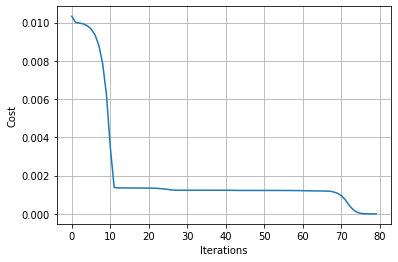

In [65]:
plot(T.J)
grid(1)
xlabel('Iterations')
ylabel('Cost')


In [67]:
NN.costFunctionPrime(X,y)



(array([[-3.58315235e-07,  4.36655447e-07, -2.58425878e-07],
        [ 3.34486745e-07, -1.13231968e-06, -1.07550105e-06]]),
 array([[-2.97709783e-06],
        [-3.74714093e-06],
        [-3.27015920e-06]]))

In [68]:
NN.forward(X)


array([[0.74998824],
       [0.82004574],
       [0.92985355]])

In [69]:
#Test network for various combinations of sleep/study:
hoursSleep = linspace(0, 10, 100)
hoursStudy = linspace(0, 5, 100)

#Normalize data (same way training data way normalized)
hoursSleepNorm = hoursSleep/10.
hoursStudyNorm = hoursStudy/5.

#Create 2-d versions of input for plotting
a, b  = meshgrid(hoursSleepNorm, hoursStudyNorm)

#Join into a single input matrix:
allInputs = np.zeros((a.size, 2))
allInputs[:, 0] = a.ravel()
allInputs[:, 1] = b.ravel()


In [70]:
allOutputs = NN.forward(allInputs)


Text(0, 0.5, 'Hours Study')

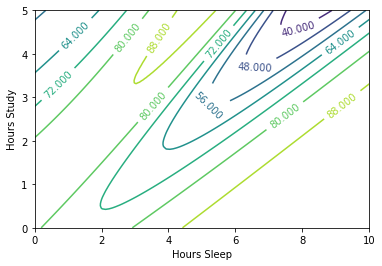

In [71]:
#Contour Plot:
yy = np.dot(hoursStudy.reshape(100,1), np.ones((1,100)))
xx = np.dot(hoursSleep.reshape(100,1), np.ones((1,100))).T

CS = contour(xx,yy,100*allOutputs.reshape(100, 100))
clabel(CS, inline=1, fontsize=10)
xlabel('Hours Sleep')
ylabel('Hours Study')


Text(0.5, 0, 'Test Score')

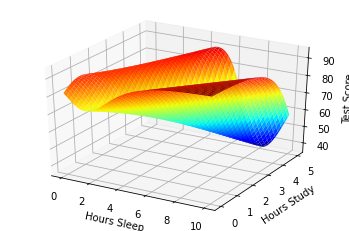

In [72]:
#3D plot:

##Uncomment to plot out-of-notebook (you'll be able to rotate)
#%matplotlib qt

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(xx, yy, 100*allOutputs.reshape(100, 100), \
                       cmap=cm.jet)

ax.set_xlabel('Hours Sleep')
ax.set_ylabel('Hours Study')
ax.set_zlabel('Test Score')
